#### [ IRIS 꽃받침 길이, 너비, 꽃잎 길이기반 꽃잎 너비 예측 모델 + 교차검증 ]
- 데이터셋 : iris.csv
- 학습종류 : 지도학습 / 회귀(Regression) 
- 알고리즘 : 분석 후 결정 
- 피쳐 : 꽃받침 길이, 꽃받침 너비, 꽃잎 길이  ==> 다변량 
- 타겟 : 꽃잎 너비
- 검증 : 5개 교차검증 진행 

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
## [1-1] 모듈로딩 
import pandas as pd                                             ## 데이터 분석 및 전처리용 모듈
import matplotlib.pyplot as plt                                 ## 데이터 시각화
from sklearn.model_selection import train_test_split            ## 학습용 / 검증용 / 테스트용 데이터 분리 및 처리용 모듈
from sklearn.model_selection import KFold                       ## 교차검증


In [2]:
## [1-2] 데이터 준비
DATA_FILE = '../data/iris.csv' 

In [3]:
## - "sepal.length","sepal.width","petal.length","petal.width" 4개 컬럼만 추출
irisDF = pd.read_csv(DATA_FILE, usecols=[0,1,2,3])
irisDF.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


[2] 데이터 분석 - 탐색적 데이터 분석 <hr>

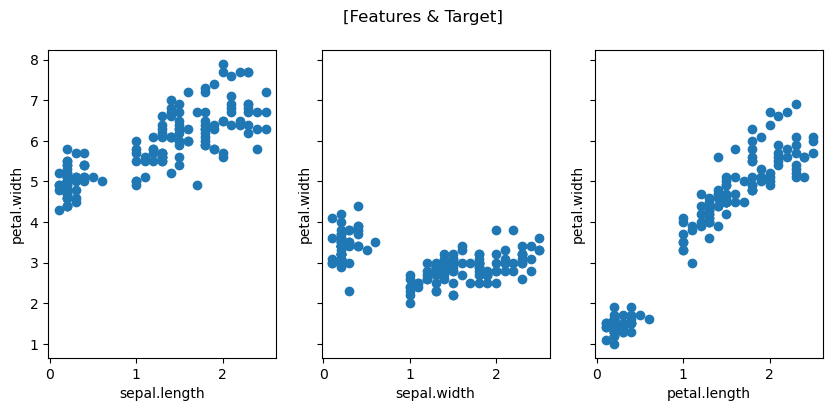

In [4]:
## 시각화 
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 4))

axes = axes.flatten()
titles = irisDF.columns[:-1]

for title, ax in zip(titles, axes):
    ax.scatter(irisDF['petal.width'], irisDF[title])
    ax.set_xlabel(title)
    ax.set_ylabel('petal.width')
plt.suptitle("[Features & Target]")
plt.show()

In [5]:
## - 수치화 
irisDF.corr()['petal.width']

sepal.length    0.817941
sepal.width    -0.366126
petal.length    0.962865
petal.width     1.000000
Name: petal.width, dtype: float64

- 탐색적 데이터 분석 결과
    * 알고리즘 : 선형 회귀 => 규제선형모델 Ridge, Lasso, ElasticNet
    * 선택피쳐 : sepal.length, sepal.width, petal.length

[3] 데이터셋 준비 <hr>
- 학습용 데이터셋 : 학습에만 사용되는 데이터셋 => 해당 데이터셋에서 피쳐와 타겟의 규칙/패턴 찾기 
- 검증용 데이터셋 : 학습 중 규칙/패턴 제대로 학습 여부 검사용 
- 테스트용 데이터셋 : 모델 완성 후 테스트용 데이터셋
- Scikit-learn 패키지 특성으로 학습용과 테스트용만 사용 

In [6]:
## [3-1] 피쳐와 타겟 분리 
featureDF = irisDF[irisDF.columns[:-1]]  # feature 3개
targetSR = irisDF[irisDF.columns[-1]]

print(f'featureDF => {featureDF.ndim}D  ,  {featureDF.shape}')
print(f'targetSR  => {targetSR.ndim}D  ,  {targetSR.shape}')

featureDF => 2D  ,  (150, 3)
targetSR  => 1D  ,  (150,)


In [7]:
## [3-2] 학습용과 테스트용 데이터셋 분리 => 학습용 : 테스트용 = 75% : 25%
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    random_state=5)

In [8]:
print(f'X_train => {X_train.ndim}D  ,  {X_train.shape} | y_train => {y_train.ndim}D  ,  {y_train.shape}')
print(f'X_test  => {X_test.ndim}D  ,  {X_test.shape}  | y_test  => {y_test.ndim}D  ,  {y_test.shape}')

X_train => 2D  ,  (112, 3) | y_train => 1D  ,  (112,)
X_test  => 2D  ,  (38, 3)  | y_test  => 1D  ,  (38,)


[4] 학습 진행 <hr>

In [9]:
## 모듈로딩
from sklearn.linear_model import Ridge, Lasso, ElasticNet                                             ## 알고리즘 모듈
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error  ## 성능평가 관련 모듈

In [ ]:
## 교차검증 객체 생성 - 5개 분할 [기본]
kf = KFold()

In [ ]:
## 교차검증으로 학습 및 검증 진행
resultDF = pd.DataFrame(columns=['alpha', 'train_score','test_score', 'train_loss', 'test_loss'])
coefDF = pd.DataFrame(columns=["sepal.length","sepal.width","petal.length"])

## - alpha값에 따른 Ridge 모델 성능 비교
for alpha in [0.1, 0.5, 1.0, 1.5, 2, 5, 10]:
    ## 선형회귀 모델 객체 생성 
    lr = Ridge(alpha)

    train_stotal, test_stotal = 0, 0
    train_ltotal, test_ltotal = 0, 0
    for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
        ## - 학습용/테스트용 피쳐와 타겟 추출
        train_data, train_label = X_train.iloc[train_index, 1:],  y_train.iloc[train_index] 
        test_data, test_label   = X_train.iloc[test_index, 1:],  y_train.iloc[test_index] 

        ## - 학습
        lr.fit(train_data, train_label)

        coefDF
        ## - 성능평가
        train_score=lr.score(train_data, train_label)
        test_score =lr.score(test_data, test_label)

        ## - 손실계산
        train_loss=root_mean_squared_error(train_label, lr.predict(train_data))
        test_loss =root_mean_squared_error(test_label, lr.predict(test_data))

        ## - 성능값과 손실값 누적 
        train_stotal += train_score
        test_stotal  += test_score
        train_ltotal += train_loss
        test_ltotal  += test_loss

    ## alpha값 별로 성능과 손실값 평균 저장하기
    resultDF.loc[f'alpha_{alpha}'] = [alpha, train_stotal/5, test_stotal/5, train_ltotal/5, test_ltotal/5]


## - 결과 확인
resultDF


,alpha,train_score,test_score,train_loss,test_loss
alpha_0.1,0.1,0.933824,0.929448,0.197103,0.200867
alpha_0.5,0.5,0.933817,0.929515,0.197114,0.200787
alpha_1.0,1.0,0.933795,0.929580,0.197146,0.200713
alpha_1.5,1.5,0.933761,0.929625,0.197198,0.200666
alpha_2,2.0,0.933716,0.929653,0.197265,0.200643
alpha_5,5.0,0.933261,0.929542,0.197944,0.200881
alpha_10,10.0,0.932018,0.928662,0.199786,0.202226


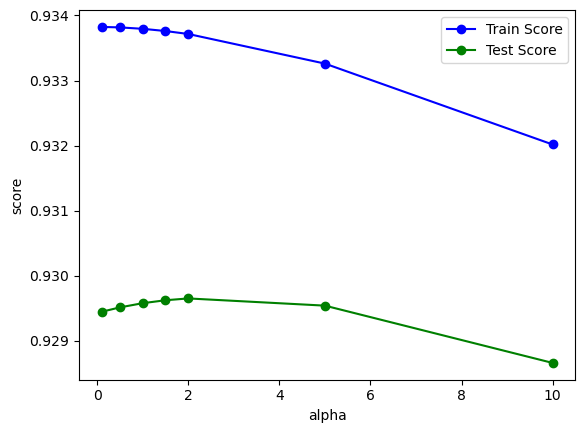

In [19]:
plt.plot(resultDF['alpha'], resultDF['train_score'], 'bo-', label='Train Score')
plt.plot(resultDF['alpha'], resultDF['test_score'], 'go-', label='Test Score')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend()
plt.show()